# Marketing and Retail Analytics

### Problem Statement

OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data cleaning

Exploring and cleaning the datasets one by one from the excel file.

#### 1. Orders

In [2]:
#Reading the orders dataset
orders = pd.read_excel("Retail_data.xlsx", sheet_name = "orders")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [3]:
orders.shape

(99441, 7)

In [4]:
#Checking duplicate values for the column order id
orders["order_id"].duplicated().sum()

0

In [5]:
#checking duplicate values for the column customer id
orders["customer_id"].duplicated().sum()

3345

In [6]:
orders["customer_id"].value_counts().sort_values(ascending=False).head(10)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
f0e310a6839dce9de1638e0fe5ab282a     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
63cfc61cee11cbe306bff5857d00bfe4     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
dc813062e0fc23409cd255f7f53c7074     6
Name: customer_id, dtype: int64

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [8]:
orders["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [9]:
#Filtering the order status to delivered
orders = orders[orders["order_status"] == "delivered"]
orders.shape

(96478, 7)

In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [11]:
#Checking null values present in the data set
orders.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

In [12]:
#Filling the missing values
orders["order_approved_at"].fillna(orders["order_purchase_timestamp"],inplace=True)
orders["order_delivered_timestamp"].fillna(orders["order_estimated_delivery_date"],inplace=True)

In [13]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

#### 2. Order_items

In [14]:
#Reading order items dataset
order_items = pd.read_excel("Retail_data.xlsx",sheet_name="order_items")
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [15]:
order_items.shape

(112650, 6)

In [16]:
#Checking duplicates
order_items.duplicated().sum()

0

In [17]:
#Checking null values
order_items.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

#### 3. Customers

In [18]:
#Reading customers dataset
customers = pd.read_excel("Retail_data.xlsx",sheet_name="customers")
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
customers.shape

(99441, 4)

In [20]:
#Checking null values
customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
#Checking duplicates
customers["customer_id"].duplicated().sum()

3345

In [22]:
#Dropping the duplicates
customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [23]:
customers.shape

(96096, 4)

#### 4. Payments

In [24]:
#Reading payments dataset
payments = pd.read_excel("Retail_data.xlsx",sheet_name="payments")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
payments.shape

(103886, 5)

In [26]:
#Checking duplicates
payments.duplicated().sum()

0

In [27]:
#Checking null values
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [28]:
#Checking the most used 'payment_type' and their counts.
payments["payment_type"].value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [29]:
#Since there are only 3 recors affected, we can drop these records.

i=payments[payments['payment_type']=='not_defined'].index
payments.drop(i, axis=0, inplace=True)

In [30]:
payments["payment_type"].value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

#### 5. Products

In [31]:
#Reading products dataset
products = pd.read_excel("Retail_data.xlsx",sheet_name="products")
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [32]:
products.shape

(32951, 6)

In [33]:
#Checking duplicates
products.duplicated().sum()

0

In [34]:
#checking null values
products.isnull().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [35]:
#Replacing the null values with mode value
products["product_category_name"].mode()

0    toys
dtype: object

In [36]:
products["product_category_name"].fillna(products["product_category_name"].mode()[0],inplace=True)

In [37]:
products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [38]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [39]:
#Visualizing numerical columns to fill the missing values
num_col =["product_weight_g","product_length_cm","product_height_cm","product_width_cm"]

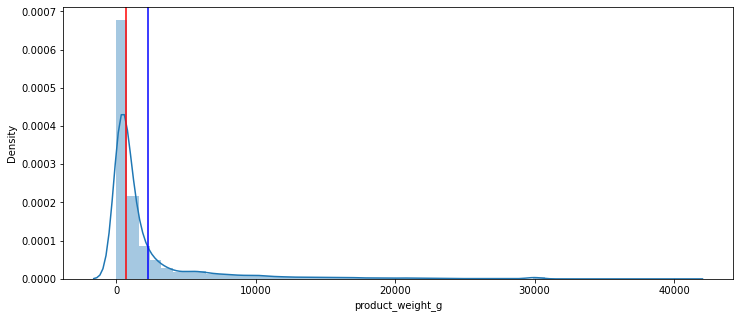

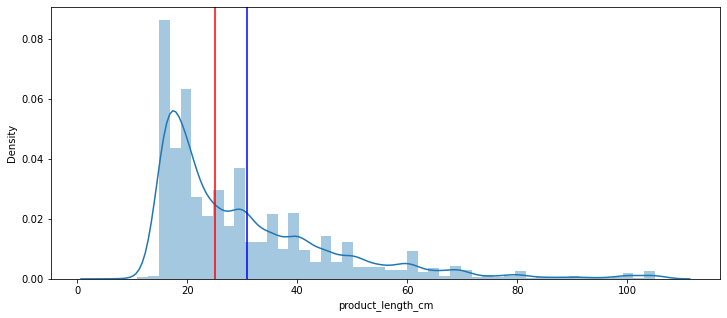

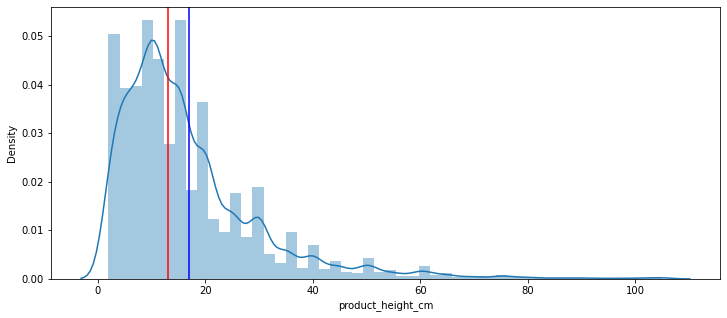

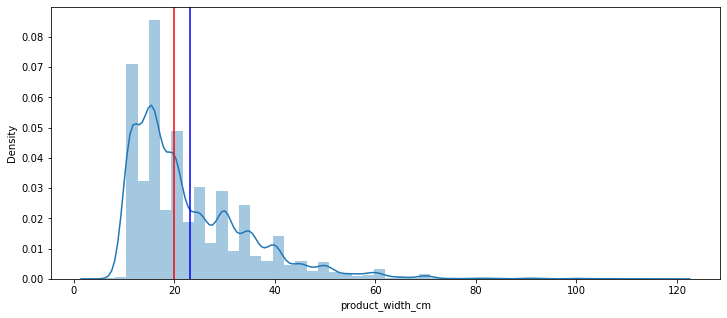

In [40]:
for i in num_col:
    plt.figure(figsize=(12,5))
    sns.distplot(products[i])
    plt.axvline(products[i].mean(), color="blue")
    plt.axvline(products[i].median(), color="red")
    plt.show()

In [41]:
for i in num_col:
    products[i].fillna(products[i].median(), inplace=True)

In [42]:
products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

### Merging Dataframes

Creating a new dataframe 'New_retail', which will contain the data merged using different dataframes.

In [43]:
#Merging 'orders' with 'order_items'
New_retail = pd.merge(orders,order_items,how='inner',on='order_id')

In [44]:
New_retail.shape

(110197, 12)

In [45]:
#Merging 'New_retail' with 'products'
New_retail = pd.merge(New_retail,products,how='inner',on='product_id')

In [46]:
New_retail.shape

(110197, 17)

In [47]:
#Merging 'New_retail' with 'payments'
New_retail = pd.merge(New_retail,payments,how='inner',on='order_id')

In [48]:
New_retail.shape

(115035, 21)

In [49]:
#Merging 'New_retail' with 'customers'
New_retail = pd.merge(New_retail,customers,how='inner',on='customer_id')

In [50]:
New_retail.shape

(115035, 24)

In [51]:
New_retail.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,1,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3,voucher,1,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,2,voucher,1,18.59,3149,sao paulo,SP
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,...,19.0,14.0,12.0,1,credit_card,1,44.11,3149,sao paulo,SP
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,3,37.77,3366,sao paulo,SP


In [52]:
New_retail.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

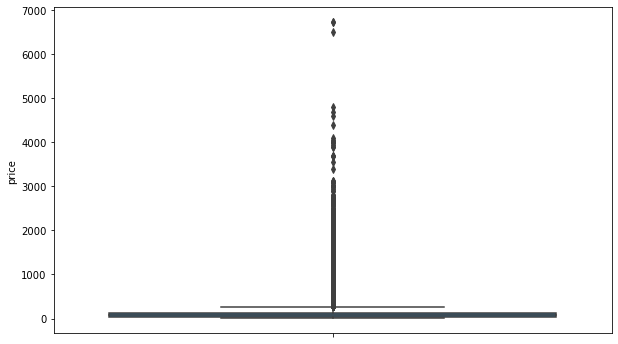

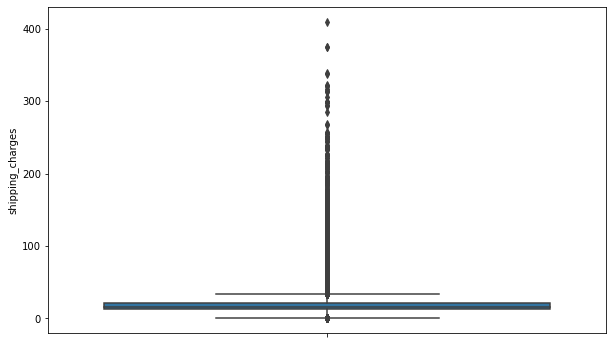

In [53]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=New_retail, y=New_retail['price'])
plt.figure(figsize=(10,6))
sns.boxplot(data=New_retail, y=New_retail['shipping_charges'])
plt.show()

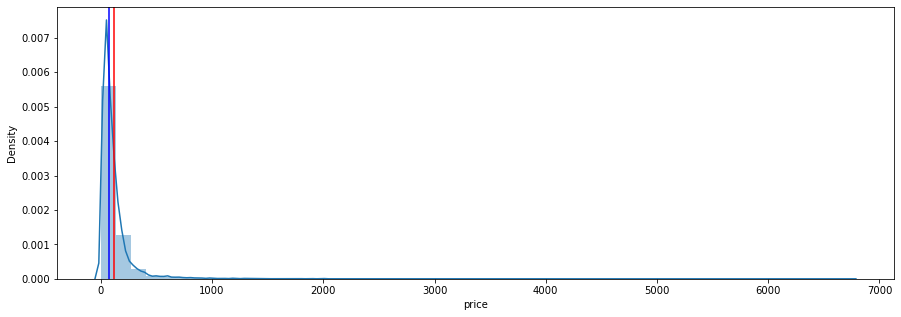

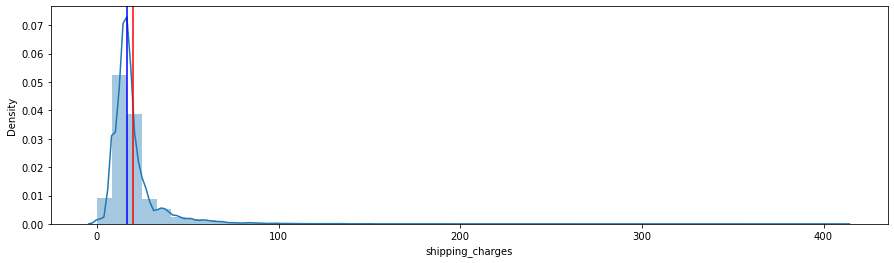

In [54]:
#Visualizing price and shipping charges for imputation
plt.figure(figsize=(15,5))
sns.distplot(New_retail.price)
plt.axvline(New_retail.price.mean(), color="red")
plt.axvline(New_retail.price.median(), color="blue")
plt.figure(figsize=(15,4))
sns.distplot(New_retail.shipping_charges)
plt.axvline(New_retail.shipping_charges.mean(), color="red")
plt.axvline(New_retail.shipping_charges.median(), color="blue")
plt.show()

In [55]:
#Imputing outliers using median values
New_retail.loc[((New_retail['price']>3000) & (New_retail['product_category_name']=='toys')), 'price']=New_retail['price'].median()
New_retail.loc[New_retail['shipping_charges']>100, 'shipping_charges'] = New_retail['shipping_charges'].median()

### Exporting cleaned data to excel

In [56]:
from pandas import ExcelWriter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
#Extracting the clean datasheets to be uploaded
with pd.ExcelWriter(r"C:\Users\Dell\Downloads\UpGrad\Capstone Project\Cleaned_Retail_Data.xlsx") as excel_sheets:
    #Extracting the clean datasheets
    orders.to_excel(excel_sheets, sheet_name="orders", index=False)
    order_items.to_excel(excel_sheets, sheet_name="order_items", index=False)
    products.to_excel(excel_sheets, sheet_name="products", index=False)
    customers.to_excel(excel_sheets, sheet_name="customers", index=False)
    payments.to_excel(excel_sheets, sheet_name="payments", index=False)

# Market Basket Analysis

### Apriori Algorithm & Association Rule
Apriori algorithms is a data mining algorithm used for mining frequent itemsets and relevant association rules. It is devised to operate on a database that contain transactions -like, items bought by a customer in a store.

An itemset can be considered frequent if it meets a user-specified support threshold. For example, if the support threshold is set to 0.5(50%), a frequent itemset is a set of items that are bought/purchased together in atleast 50% of all transactions.

Association rules are a set of rules derived from a database, that can help determining relationship among variables in a large transactional database

In [58]:
#Installing external package
!pip install mlxtend

In [59]:
# Importing libraries for performing Market Basket Analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [60]:
#Updating New_retail dataframe with only the required columns for market basket analysis
New_retail = New_retail[['order_id','product_category_name', 'order_item_id']]

In [61]:
#Checking for duplicate values
New_retail.duplicated().sum()

4841

In [62]:
#Dropping the duplicate values
New_retail.drop_duplicates(keep='first', inplace=True)

In [63]:
#Creating prd_combo dataframe using pandas pivot table
product_combo = pd.pivot_table(data=New_retail,index='order_id',columns='product_category_name',
                              values='order_item_id',fill_value=0)

In [64]:
product_combo.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
#For basket analysis encoding the data to 1s and 0s 
def encode_data(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
product_combo_encode = product_combo.applymap(encode_data)

In [66]:
product_combo_encode.shape

(96477, 70)

In [67]:
#Dropping the Product_cataegories (columns) whose sum value (total_sale) is less than equal to 5
for column in product_combo_encode.columns:
    if (product_combo_encode[column].sum(axis=0, skipna=True)<=5):
        product_combo_encode.drop(column, inplace=True, axis=1)

In [68]:
product_combo_encode.shape

(96477, 61)

Selecting only those order_ids where at least two items were purchased to find product combinations.This is required else the 'Toys' product_category will affect the whole analysis as the Support value for 'Toys' is biased due to its too much presence as single item orders 

In [69]:
product_combo_encode = product_combo_encode[(product_combo_encode>0).sum(axis=1)>=2]
product_combo_encode.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Generating frequent itemsets from a list of items

First step in generation of association rules is to get all the frequent itemsets.Frequent itemsets are the ones which occur at least a minimum number of times in the transactions.

#### Support
This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears

If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets
#### Confidence
This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears

One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.
#### Confidence(x-->Y) = Support(X,Y)/Support(X)
#### Lift
This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought
#### Lift (X-->Y) = Support(X,Y)/Support(X)*Support(Y)

In [70]:
#Call apriori function and passing minimum support here we are passing 3%, which means at least 3% in total number of transaction the item should be present.'''

frequent_items = apriori(product_combo_encode, min_support=0.03, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_items

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.971139,(toys)
1,0.230889,(bed_bath_table)
2,0.226989,"(toys, bed_bath_table)"
3,0.127145,(furniture_decor)
4,0.119345,"(toys, furniture_decor)"
5,0.084243,(computers_accessories)
6,0.080343,"(toys, computers_accessories)"
7,0.066303,(health_beauty)
8,0.063183,"(toys, health_beauty)"
9,0.058502,(watches_gifts)


#### Generating all possible rules from the frequent itemsets.

After the frequent itemsets are generated, identifying rules such as Confidence and Lift

In [71]:
#We would apply association rules on frequent itemset to find product combinations
rules_conf = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714
1,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580
2,(toys),(furniture_decor),0.971139,0.127145,0.119345,0.122892,0.966546,-0.004131,0.995151
3,(furniture_decor),(toys),0.127145,0.971139,0.119345,0.938650,0.966546,-0.004131,0.470437
4,(computers_accessories),(toys),0.084243,0.971139,0.080343,0.953704,0.982047,-0.001469,0.623401
5,(health_beauty),(toys),0.066303,0.971139,0.063183,0.952941,0.981262,-0.001207,0.613300
6,(watches_gifts),(toys),0.058502,0.971139,0.056942,0.973333,1.002260,0.000128,1.082293
7,(housewares),(toys),0.053822,0.971139,0.049142,0.913043,0.940178,-0.003127,0.331903
8,(sports_leisure),(toys),0.055382,0.971139,0.048362,0.873239,0.899191,-0.005422,0.227682
9,(garden_tools),(toys),0.042122,0.971139,0.035101,0.833333,0.858099,-0.005805,0.173167


In [72]:
#Keeping minimum lift as >1.
rules_lift=rules_conf[(rules_conf['lift'] > 1)]
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714
1,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580
6,(watches_gifts),(toys),0.058502,0.971139,0.056942,0.973333,1.002260,0.000128,1.082293
10,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168
11,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446


## Observations

Top products categories in groups of two’s are:

1. Toys and Bed Bath Table
2. Toys and Fashion Bags Accessories
3. Toys and Auto
4. Toys and Watches Gift


In [73]:
# Filter the Basket with the sum of values having >=3

product_combo_encode_1 = product_combo_encode[(product_combo_encode > 0).sum(axis=1) >=3]
product_combo_encode_1

product_category_name,agro_industry_and_commerce,air_conditioning,art,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
0a77b770428bccbea7f9dbf8aec5d6ae,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1c4a92d82c1b0dec18bef12da3fa7756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43443d5fff4b94d98df1ad41af13d302,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5337d26d14027f547caacb7fee230f81,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
91be51c856a90d7efe86cf9d082d6ae3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
a98012aa8c697f2bcff9f8c2183e0f2b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
c6a7876557e3e3e31f229852dfa4f5c3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
d4bec1a24c97bd17be18d77297a0f6a0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ddb33b0aa1ca6227208f0ca0564f0696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
frequent_items_1 = apriori(product_combo_encode_1, min_support=0.03, 
                            use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_items_1

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,1.0,(toys)
1,0.5,(bed_bath_table)
2,0.5,"(toys, bed_bath_table)"
3,0.4,(furniture_decor)
4,0.4,"(toys, furniture_decor)"
5,0.2,(garden_tools)
6,0.2,(computers_accessories)
7,0.2,"(toys, garden_tools)"
8,0.2,"(toys, computers_accessories)"
9,0.2,"(toys, furniture_decor, bed_bath_table)"


In [75]:
#We would apply association rules on frequent itemset to find product combinations
rules_conf = association_rules(frequent_items_1, metric="confidence", min_threshold=0.1)
rules_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(bed_bath_table),1.0,0.5,0.5,0.50,1.00,0.00,1.000000
1,(bed_bath_table),(toys),0.5,1.0,0.5,1.00,1.00,0.00,inf
2,(toys),(furniture_decor),1.0,0.4,0.4,0.40,1.00,0.00,1.000000
3,(furniture_decor),(toys),0.4,1.0,0.4,1.00,1.00,0.00,inf
4,(toys),(garden_tools),1.0,0.2,0.2,0.20,1.00,0.00,1.000000
...,...,...,...,...,...,...,...,...,...
89,"(toys, garden_tools)",(furniture_decor),0.2,0.4,0.1,0.50,1.25,0.02,1.200000
90,"(furniture_decor, garden_tools)",(toys),0.1,1.0,0.1,1.00,1.00,0.00,inf
91,(toys),"(furniture_decor, garden_tools)",1.0,0.1,0.1,0.10,1.00,0.00,1.000000
92,(furniture_decor),"(toys, garden_tools)",0.4,0.2,0.1,0.25,1.25,0.02,1.066667


In [76]:
#Keeping minimum lift as >1.
rules_lift=rules_conf[(rules_conf['lift'] > 1)]
rules_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,"(housewares, toys)",(bed_bath_table),0.1,0.5,0.1,1.00,2.0,0.05,inf
18,"(toys, bed_bath_table)",(housewares),0.5,0.1,0.1,0.20,2.0,0.05,1.125
19,(housewares),"(toys, bed_bath_table)",0.1,0.5,0.1,1.00,2.0,0.05,inf
21,(bed_bath_table),"(housewares, toys)",0.5,0.1,0.1,0.20,2.0,0.05,1.125
22,"(toys, furniture_decor)",(electronics),0.4,0.1,0.1,0.25,2.5,0.06,1.200


## Observations

Top products categories in groups of threes are:

1. Toys, Bed bath table and Housewares
2. Toys, Bed bath table and Office furniture	
3. Toys, Garden Tools and Computer Accessories
4. Toys, Furniture Decor and Electronics
5. Toys, Bed bath table and Health and Beauty